In [1]:
%matplotlib inline

In [2]:
from nilearn import datasets

adhd_dataset = datasets.fetch_adhd(n_subjects=30)
func_filenames = adhd_dataset.func  # list of 4D nifti files for each subject

# print basic information on the dataset
print('First functional nifti image (4D) is at: %s' %
      adhd_dataset.func[0])  # 4D data

First functional nifti image (4D) is at: /home/loula/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


In [3]:
from nilearn.decomposition import DictLearning, CanICA

n_components = 40

In [4]:
dict_learning = DictLearning(n_components=n_components,
                             memory="nilearn_cache", memory_level=2,
                             verbose=1,
                             random_state=0,
                             n_epochs=1)

In [5]:
canica = CanICA(n_components=n_components,
                memory="nilearn_cache", memory_level=2,
                threshold=3.,
                n_init=1,
                verbose=1)

In [6]:
func_filenames_one, func_filenames_two = func_filenames[:15], func_filenames[15:]

In [7]:
estimators = [dict_learning, canica]
names = {dict_learning: 'DictionaryLearning', canica: 'CanICA'}
components = []
components_imgs = []

for estimator in estimators:
    print('[Example] Learning maps using %s model' % names[estimator])
    estimator.fit(func_filenames_one)
    print('[Example] Saving results')
    # Decomposition estimator embeds their own masker
    masker = estimator.masker_
    # Drop output maps to a Nifti   file
    components_img = masker.inverse_transform(estimator.components_)
    components_img.to_filename('%s_resting_state_one.nii.gz' %
                               names[estimator])
    components_imgs.append(components_img)
    
    print('[Example] Learning maps using %s model' % names[estimator])
    estimator.fit(func_filenames_two)
    print('[Example] Saving results')
    # Decomposition estimator embeds their own masker
    masker = estimator.masker_
    # Drop output maps to a Nifti   file
    components_img = masker.inverse_transform(estimator.components_)
    components_img.to_filename('%s_resting_state_two.nii.gz' %
                               names[estimator])
    components_imgs.append(components_img)

[Example] Learning maps using DictionaryLearning model
[MultiNiftiMasker.fit] Loading data from [/home/loula/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz, /home/loula/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz, /home/loula/nilearn_data/adhd
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[DictLearning] Learning initial components
[DictLearning] Computing initial loadings

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)



[DictLearning] Learning dictionary
[Example] Saving results
[Example] Learning maps using DictionaryLearning model
[MultiNiftiMasker.fit] Loading data from [/home/loula/nilearn_data/adhd/data/1562298/1562298_rest_tshift_RPI_voreg_mni.nii.gz, /home/loula/nilearn_data/adhd/data/1679142/1679142_rest_tshift_RPI_voreg_mni.nii.gz, /home/loula/nilearn_data/adhd
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[DictLearning] Learning initial components

/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished



[DictLearning] Computing initial loadings
[DictLearning] Learning dictionary

/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)
/usr/lib/python2.7/site-packages/sklearn/externals/joblib/hashing.py:197: DeprecationWarning: Changing the shape of non-C contiguous array by
descriptor assignment is deprecated. To maintain
the Fortran contiguity of a multidimensional Fortran
array, use 'a.T.view(...).T' instead
  obj_bytes_view = obj.view(self.np.uint8)



[Example] Saving results
[Example] Learning maps using CanICA model
[MultiNiftiMasker.fit] Loading data from [/home/loula/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz, /home/loula/nilearn_data/adhd/data/0010064/0010064_rest_tshift_RPI_voreg_mni.nii.gz, /home/loula/nilearn_data/adhd
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.002956, ...,  0.001762],
       ..., 
       [ 0.002725, ..., -0.004851]]), n_iter=3, random_state=None, transpose=True, n_components=40)
___________________________________________________randomized_svd - 2.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.0034  , ..., -0.003065],
       ..., 
       [ 0.003454, ..., -0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.5s finished



[Example] Saving results
________________________________________________________________________________
[Memory] Calling nilearn.masking.unmask...
unmask(array([[ 0., ...,  0.],
       ..., 
       [-0., ..., -0.]]), <nibabel.nifti1.Nifti1Image object at 0x7fb4bb0ad750>)
___________________________________________________________unmask - 0.1s, 0.0min


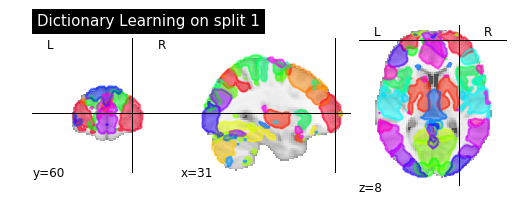

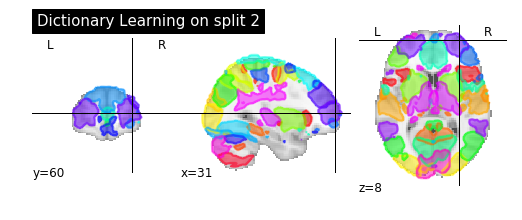

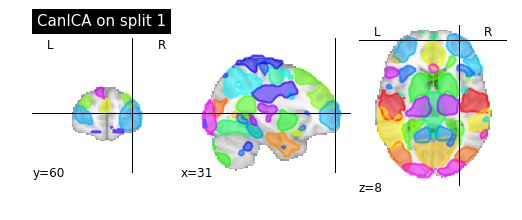

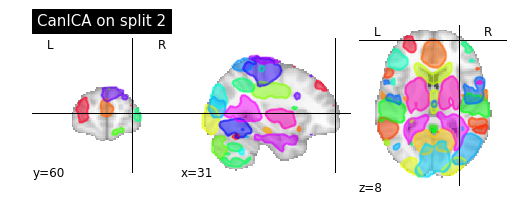

In [10]:
from nilearn.plotting import (plot_prob_atlas, find_xyz_cut_coords, show,
                              plot_stat_map)
from nilearn.image import index_img

# Labels for the images
image_labels = ["Dictionary Learning on split 1", "Dictionary Learning on split 2", 
                "CanICA on split 1", "CanICA on split 2"]
# We select relevant cut coordinates for displaying
cut_component = index_img(components_imgs[0], 0)
cut_coords = find_xyz_cut_coords(cut_component)
for label, components in zip(image_labels, components_imgs):
    # 4D plotting
    plot_prob_atlas(components, view_type="filled_contours",
                    title=label,
                    cut_coords=cut_coords, colorbar=False)
show()

In [11]:
from nilearn.connectome.jaccard_index import jaccard_index

dict_similarity = jaccard_index(components_imgs[0], components_imgs[1])
canica_similarity = jaccard_index(components_imgs[2], components_imgs[3])

In [12]:
print(dict_similarity, canica_similarity)

(0.0040594116857788033, 0.021435286752035636)
